## EDA on active reviewers (5-15 reviews)

#### Hopefully 5-15 is low enough to represent behaviors of the general population (someone with 100+ reviews might not be representative)
#### But large enough to identify general reviewer behavior (this person on average posts 4.5* rating)

In [1]:
import pandas as pd
import seaborn as sns
from operator import itemgetter
import matplotlib.pyplot as plt
from tqdm import tqdm
from itertools import repeat
import numpy as np

In [2]:
reviewer_df = pd.read_csv("../Processed_Data/reviewer_data.csv")
ratings = [1,2,3,4,5]
rating_columns = ['1*','2*','3*','4*','5*']

In [3]:
active_reviewer_df = reviewer_df.query("active_reviewer == True")

In [4]:
active_reviewer_df.shape

(5739748, 10)

In [5]:
active_reviewer_df.head(3)

,reviewerID,1*,2*,3*,4*,5*,activity,avg_rating,std_reviews,active_reviewer
8,A0024320PFCKHZ0HWVFN,0,0,1,0,5,6,4.666667,0.745356,True
15,A0040714X0G8QUCER7Q,0,0,1,2,4,7,4.428571,0.728431,True
27,A0081581LX99MYDYNRIB,1,0,1,0,5,7,4.142857,1.456863,True


Text(0.5, 1.0, 'Active Reviewer Count grouped by Average Rating given')

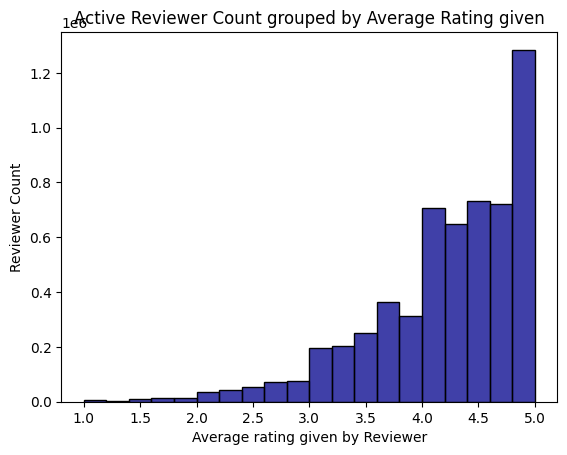

In [19]:
sns.histplot(data=active_reviewer_df, x="avg_rating", bins=20, color="darkblue")
plt.xlabel("Average rating given by Reviewer")
plt.ylabel("Reviewer Count")
plt.title("Active Reviewer Count grouped by Average Rating given")
# seems like the data isn't very polarized: most of the active reviewers have a fairly positive average rating.

One goal is to look purely at negative reviews, and guess if the review
was given by someone who generally posts negative reviews, or someone who
generally posts positive reviews

Reason is that a negative review given by a generally positive reviewer might be more informative than a negative review given by a generally negative reviewer

## Who is actually giving the 1* reviews?

In [7]:
active_reviewer_df.shape

(5739748, 10)

In [8]:
one_star_review_sources = []

In [9]:
for index, reviewer in tqdm(active_reviewer_df.iterrows(), total=active_reviewer_df.shape[0]):
    one_star_count = reviewer['1*']
    average_review_given = reviewer['avg_rating']
    
    one_star_review_sources += list(repeat(average_review_given, one_star_count))

100%|███████████████████████████████████████████████████████| 5739748/5739748 [02:53<00:00, 32989.09it/s]


In [10]:
len(one_star_review_sources)

4062204

Text(0.5, 1.0, '1* Source Reviewer Average Rating')

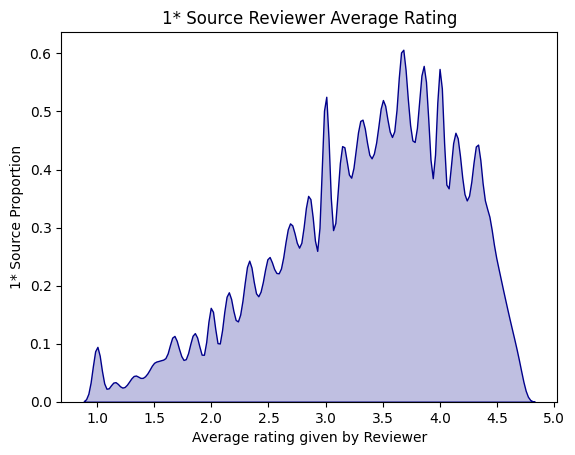

In [17]:
sns.kdeplot(one_star_review_sources, shade=True, color='darkblue')
plt.xlabel("Average rating given by Reviewer")
plt.ylabel("1* Source Proportion")
plt.title("1* Source Reviewer Average Rating")